# La question à laquelle nous cherchons à répondre est : à partir d’une photo prise par un spectateur, comment déterminer la zone où il se situe ?

## La première solution consiste en ...


### Step 1 : Point detection and matching

In [58]:
# Importing the libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from skimage.measure import ransac
from skimage.transform import EuclideanTransform

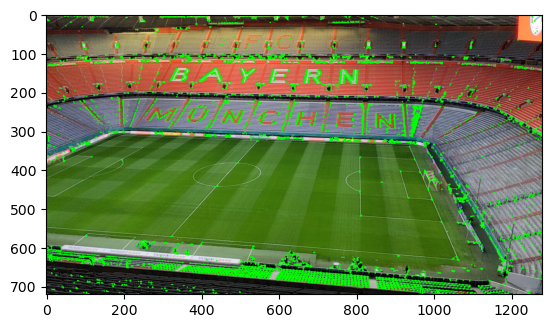

In [49]:
# Source : https://www.geeksforgeeks.org/feature-detection-and-matching-with-opencv-python/

# Feature detection with Haris Corner Detection
# This method detects the corners of the image, could work here by working with stadium-view of the pitch

# Reading the image and converting the image to B/W
image = cv2.imread('Data_Subset/1580917244346.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = np.float32(gray_image)

# Applying the function
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)

# dilate to mark the corners
dst = cv2.dilate(dst, None)
image[dst > 0.01 * dst.max()] = [0, 255, 0]

# Converts from BGR to RGB
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_RGB)

# cv2.imshow('haris_corner', image)
# cv2.waitKey()

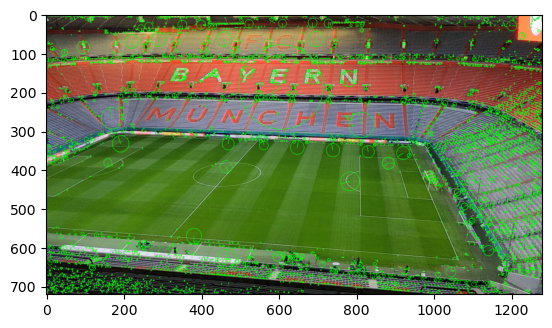

In [50]:
# Feature detection with SIFT
# Unlike Haris, SIFT does not detect the corners of an image but objects unrelated to the scale and rotation of the
# image and the reference. It returns the key points of the images that we need to mark in the image.

# Reading the image and converting into B/W
image = cv2.imread('Data_Subset/1580917244346.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying the function
sift = cv2.xfeatures2d.SIFT_create()
kp, des = sift.detectAndCompute(gray_image, None)


# Applying the function
kp_image = cv2.drawKeypoints(image, kp, None, color=(
    0, 255, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Converts from BGR to RGB
kp_image_RGB = cv2.cvtColor(kp_image, cv2.COLOR_BGR2RGB)
plt.imshow(kp_image_RGB)

# cv2.imshow('SIFT', kp_image)
# cv2.waitKey()

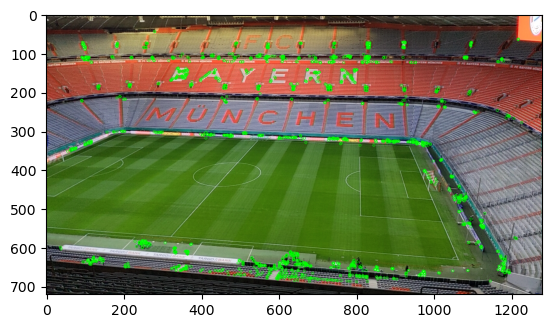

In [51]:
# Feature detection with ORB
# ORB is based on the FAST keypoint detector and a modified version of the visual descriptor BRIEF, provide a fast and
# efficient alternative to SIFT. Might be interesting with real-time problems.

# Reading the image and converting into B/W
image = cv2.imread('Data_Subset/1580917244346.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Applying the function
orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_image, None)

# Drawing the keypoints
kp_image = cv2.drawKeypoints(image, kp, None, color=(0, 255, 0), flags=0)

# Converts from BGR to RGB
kp_image_RGB = cv2.cvtColor(kp_image, cv2.COLOR_BGR2RGB)
plt.imshow(kp_image_RGB)

# cv2.imshow('ORB', kp_image)
# cv2.waitKey()


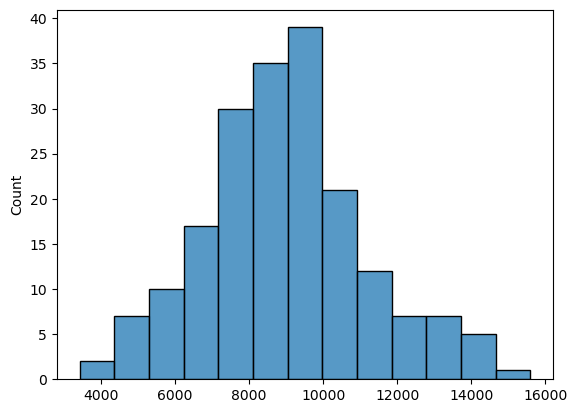

3420


In [52]:
# Compute the number of keypoints extracted for each image thanks to SIFT method

number_of_keypoints = []

# Iterate over images
for filename in os.listdir("Data_Subset"):
    image_file = os.path.join("Data_Subset", filename)
    image = cv2.imread(image_file)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Applying SIFT
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(gray_image, None)

    number_of_keypoints.append(len(kp))

sns.histplot(data=number_of_keypoints)
plt.show()

print(min(number_of_keypoints))

The distribution of number of extracted keypoints for each image seems to follow a Gaussian centered at about 9000. More
 than 3000 keypoints are detected for all images. For computation speed purposes, we will limit ourselves to 2000
 keypoints extracted by ORB.


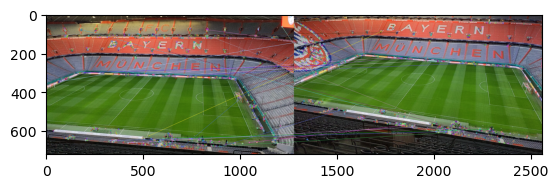

TypeError: Expected Ptr<cv::UMat> for argument 'srcPoints'

In [71]:
# Reading the image and converting into B/W
image = cv2.imread('Data_Subset/1580917244346.jpg')
image2 = cv2.imread('Data_Subset/1580917250912.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Applying the function
orb = cv2.ORB_create(nfeatures=2000)
kp, des = orb.detectAndCompute(gray_image, None)
kp2, des2 = orb.detectAndCompute(gray_image2, None)

matcher = cv2.BFMatcher()
matches = matcher.match(des,des2)

final_img = cv2.drawMatches(image, kp, image2, kp2, matches[:20], None)
# Converts from BGR to RGB
kp_image_RGB = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
plt.imshow(kp_image_RGB)
plt.show()


matrix, mask = cv2.findHomography(query_pts, train_pts, cv2.RANSAC, 5.0)